# 11-experiment-three-cogsci

## Analysis

In [11]:
# Analytical Tools
import random
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# General Utilities
import itertools
import json
import pprint

# Custom Utilities
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None

### Import Data & Define Constants

In [12]:
GROUPS = 3
QUESTIONS = 4
JUDGMENTS = 4
SCORE_THRESHOLD = 240.9

data = pd.read_pickle('data/responses.pkl')
data.head()

,id,consent,attention,g0_q0_score,g0_q0_index,g0_q0_j0,g0_q0_j1,g0_q0_j2,g0_q0_j3,g0_q1_score,...,g2_q2_j2,g2_q2_j3,g2_q3_score,g2_q3_index,g2_q3_j0,g2_q3_j1,g2_q3_j2,g2_q3_j3,j_mean,j_std
0,hu18z57qr2ja4v6jh24c57fk0b5ftdqs,1,1,22,35,5,1,0,1,27,...,5,2,2395,36,4,0,3,3,3.166667,1.837359
1,xev0ec5nfz6bfwq1h4puuscnk0eg8ck8,1,1,40,18,3,0,2,1,28,...,3,3,2416,2,3,2,3,4,2.354167,1.081559
2,upfop1hxok2r4hynbr5yfwty3q5628wr,1,1,28,2,5,0,5,2,19,...,1,2,2404,40,1,2,4,3,2.791667,1.687984
3,goxzca1lx6vlbzmf9la861fhqlmtxlmn,1,1,32,27,4,2,4,3,41,...,4,3,2398,16,2,1,2,2,2.854167,1.414057
4,j06j83a97loyc5won1rk9hg46qrwnzbs,1,1,24,10,6,0,2,3,22,...,1,0,2388,8,4,0,4,1,2.583333,2.220153


### Analysis

In [13]:
for g_num in range(GROUPS):
    for j_num in range(JUDGMENTS):
        headings = []
        for q_num in range(QUESTIONS):
            headings.append('g{}_q{}_j{}'.format(g_num, q_num, j_num))
        
        rating_mean = data[headings].mean(axis=1)
        data['g{}_j{}_mean'.format(g_num, j_num)] = rating_mean

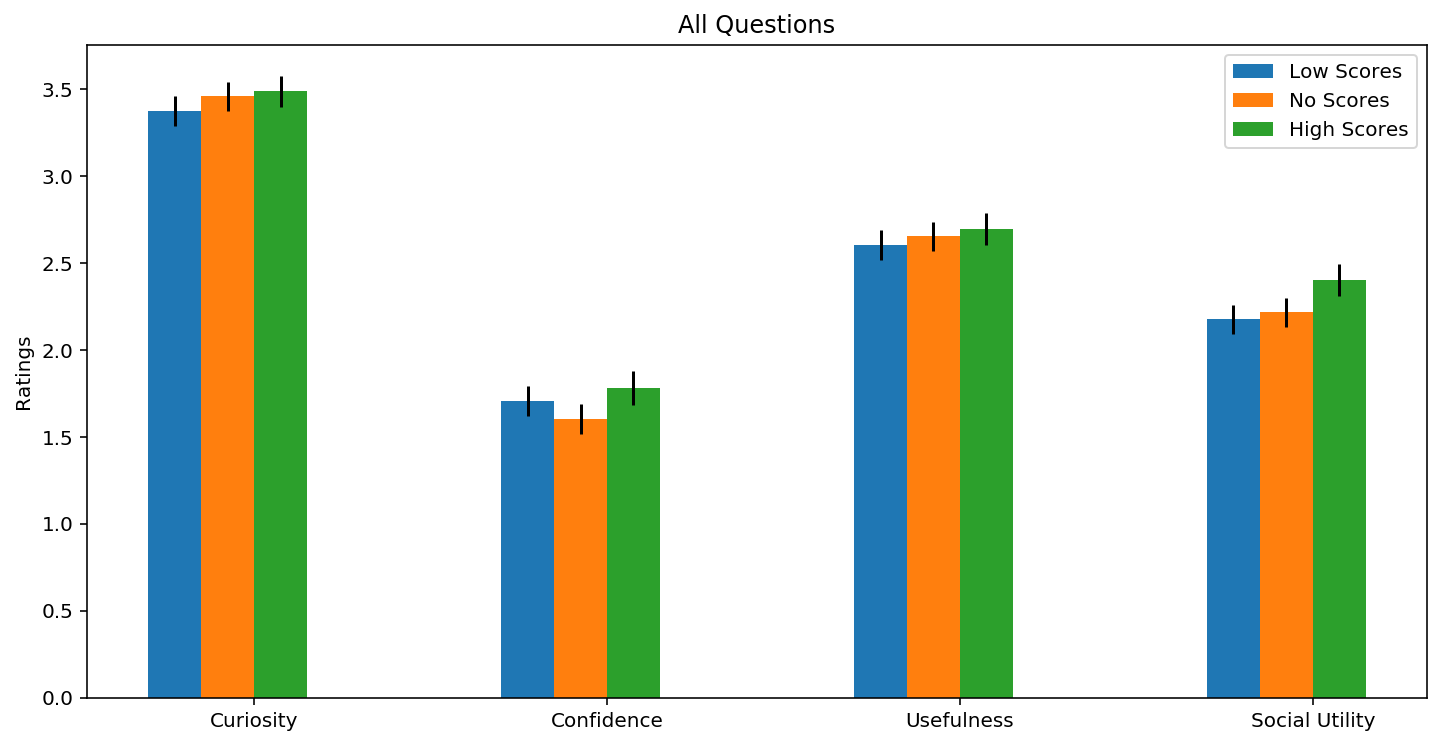

[3.3759328358208953, 1.7061567164179106, 2.605410447761194, 2.1772388059701493]
[3.4608208955223883, 1.6044776119402986, 2.655783582089552, 2.216417910447761]
[3.487873134328358, 1.7807835820895523, 2.6949626865671643, 2.40205223880597]


In [14]:
PLOTTING_OPTIONS = {
    'ylabel': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness','Social Utility'],
    'legend': ['Low Scores', 'No Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

for _ in range(1):
    sample = data.iloc[random.sample(range(len(data)), len(data))]
    
    g0_means, g0_errs = [], []
    g1_means, g1_errs = [], []
    g2_means, g2_errs = [], []
    for j_num in range(JUDGMENTS):
        g0_values = sample['g0_j{}_mean'.format(j_num)]
        g1_values = sample['g1_j{}_mean'.format(j_num)]
        g2_values = sample['g2_j{}_mean'.format(j_num)]
        g0_means.append(g0_values.mean())
        g1_means.append(g1_values.mean())
        g2_means.append(g2_values.mean())
        g0_errs.append(stats.sem(g0_values))
        g1_errs.append(stats.sem(g1_values))
        g2_errs.append(stats.sem(g2_values))

    plotting.plot_triple_bar(g0_means, g0_errs, g1_means, g1_errs, 
                             g2_means, g2_errs, **PLOTTING_OPTIONS)

print(g0_means)
print(g1_means)
print(g2_means)

In [15]:
print('Low & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('Low & None')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g1_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('None & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))

Low & High
Curiosity: t = -1.4, p = 0.162, Δ = 0.112 (1 greater)
Confidence: t = -1.12, p = 0.263, Δ = 0.0746 (1 greater)
Usefulness: t = -1.23, p = 0.218, Δ = 0.0896 (1 greater)
Social Utility: t = -3.57, p = 0.000428, Δ = 0.225 (1 greater)

Low & None
Curiosity: t = -1.22, p = 0.224, Δ = 0.0849 (1 greater)
Confidence: t = 1.57, p = 0.118, Δ = -0.102 (0 greater)
Usefulness: t = -0.79, p = 0.43, Δ = 0.0504 (1 greater)
Social Utility: t = -0.677, p = 0.499, Δ = 0.0392 (1 greater)

None & High
Curiosity: t = -0.36, p = 0.719, Δ = 0.0271 (1 greater)
Confidence: t = -2.7, p = 0.0074, Δ = 0.176 (1 greater)
Usefulness: t = -0.573, p = 0.567, Δ = 0.0392 (1 greater)
Social Utility: t = -2.86, p = 0.00462, Δ = 0.186 (1 greater)
